# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pycaret.classification import *

# Data Read-In

In [2]:
data = pd.read_csv("data/iris.csv", header=None)
data.columns = ["feature_1", "feature_2", "feature_3", "feature_4", "label"]

# EDA

In [3]:
data["label"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

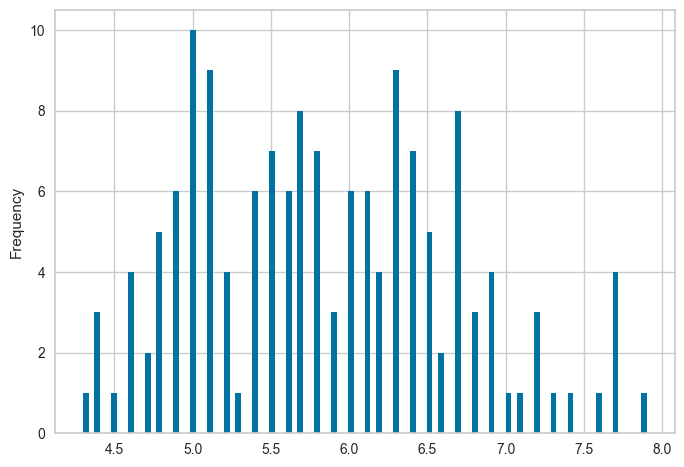

In [4]:
data["feature_1"].plot.hist(bins=100);

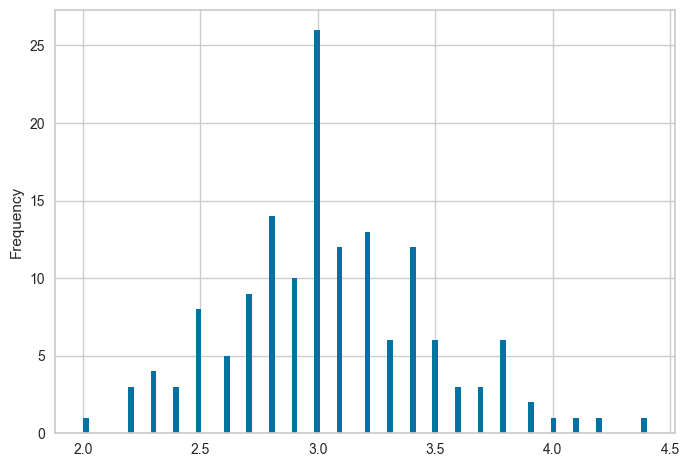

In [5]:
data["feature_2"].plot.hist(bins=100);

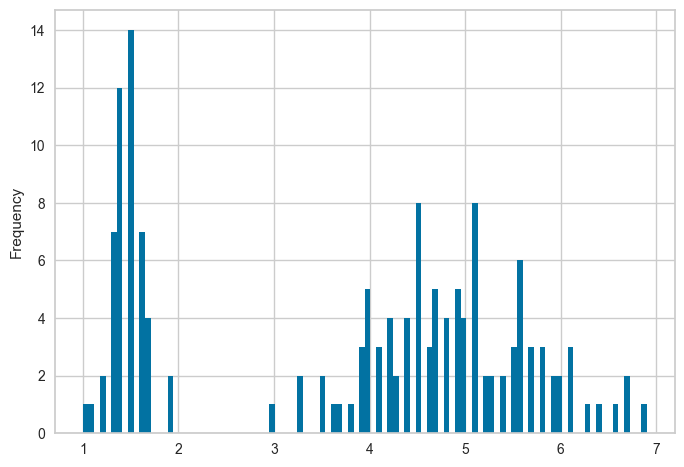

In [6]:
data["feature_3"].plot.hist(bins=100);

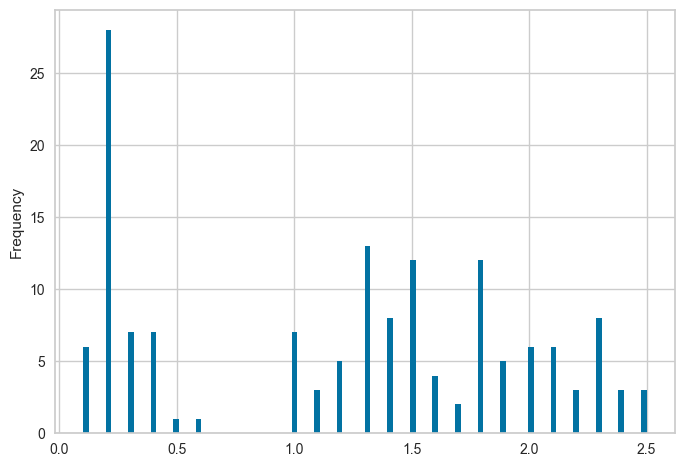

In [7]:
data["feature_4"].plot.hist(bins=100);

# Setup

In [8]:
experiment = setup(
    data, 
    target='label',
    normalize=True,
    use_gpu=True,
)

,Description,Value
0,session_id,3906
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
# Model Selection

model = compare_models(n_select=1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9909,0.9974,0.9917,0.9927,0.9908,0.9862,0.9873,0.0090
qda,Quadratic Discriminant Analysis,0.9818,0.9948,0.9833,0.9818,0.9818,0.9725,0.9725,0.0090
lightgbm,Light Gradient Boosting Machine,0.9709,0.9912,0.9722,0.9772,0.9703,0.9559,0.9597,1.3050
knn,K Neighbors Classifier,0.9627,0.9894,0.9639,0.9653,0.9618,0.9434,0.9455,0.4700
nb,Naive Bayes,0.9618,0.9974,0.9639,0.9663,0.9614,0.9422,0.9448,0.0090
et,Extra Trees Classifier,0.9618,0.9948,0.9639,0.9663,0.9614,0.9422,0.9448,0.4240
catboost,CatBoost Classifier,0.9609,0.9974,0.9639,0.9697,0.9603,0.9410,0.9461,0.7550
lr,Logistic Regression,0.9527,0.9974,0.9528,0.9590,0.9519,0.9283,0.9321,0.0140
dt,Decision Tree Classifier,0.9518,0.9631,0.9556,0.9588,0.9514,0.9273,0.9312,0.0090
rf,Random Forest Classifier,0.9518,0.9941,0.9556,0.9588,0.9514,0.9273,0.9312,0.4230


In [10]:
# Model Optimization

tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9091,0.9740,0.9167,0.9273,0.9076,0.8625,0.8735
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [11]:
# Finalize model
finalized_model = finalize_model(tuned_model)

# save model to disk
save_model(finalized_model, 'model_for_iris_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dummy', Dummify(target='label')),
                 ('fix_perfect', Remove_100(target='label')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs